In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.util import random_noise
from skimage import exposure
from Functions import *
import itertools
import time

In [2]:
axis_font = {'fontname':'Arial', 'size':'16'}
%matplotlib inline

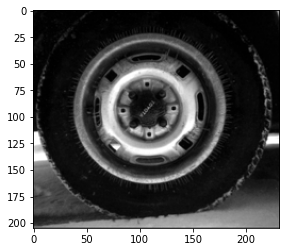

In [3]:
#in order to load a differant photo cange the path

img_gray = cv.imread("Pictures\\tire.tif", cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap = 'gray')

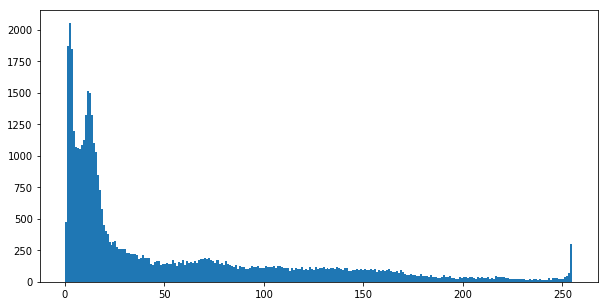

In [109]:

fig, ax = plt.subplots(figsize=[10,5])
ax.hist(img_gray.flatten(), bins = 256,stacked=True) 
plt.show()

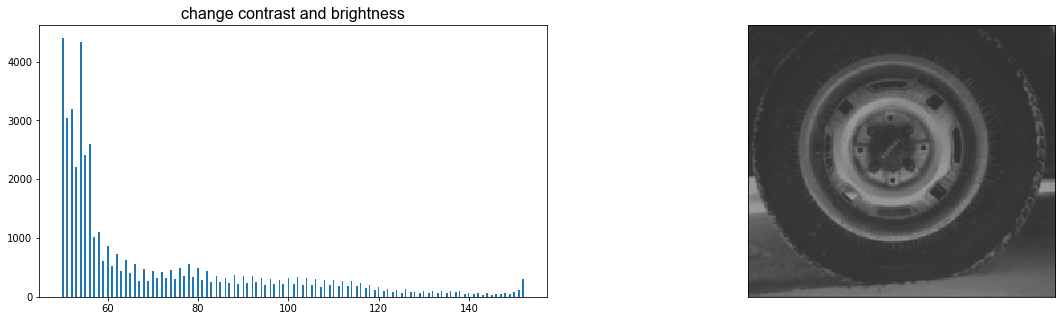

In [110]:
#-------------------------------------------Lab 1.1 - Warm up section-------------------------------------------
# 1.1.1
fig, ax = plt.subplots(1,2,figsize=[20,5])
ax[0].set_title('change contrast and brightness',**axis_font)
img_shifted_scaled = ( img_gray* 0.4 + 50).astype('uint8')
ax[0].hist(img_shifted_scaled.flatten(), bins = 256,stacked=True) 
ax[1].imshow(img_shifted_scaled, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

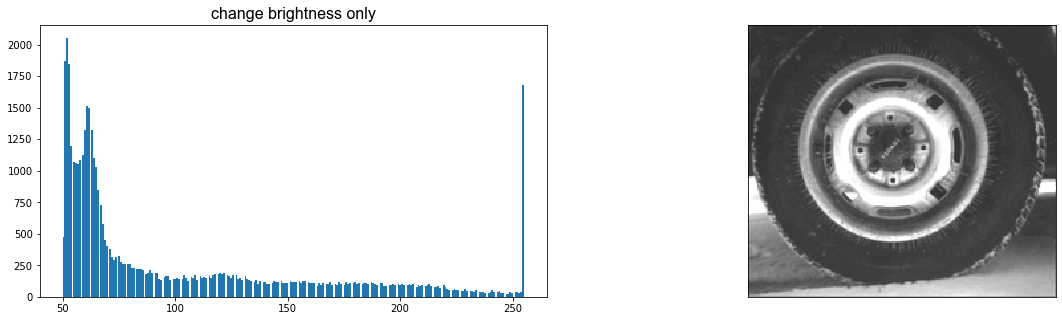

In [111]:
# 1.1.2 
fig, ax = plt.subplots(1,2,figsize=[20,5])
ax[0].set_title('change brightness only',**axis_font)
img_shifted = (np.clip(img_gray.astype('float64') + 50, 0, 255)).astype('uint8')
ax[0].hist(img_shifted.flatten(), bins = 256,stacked=True) 
ax[1].imshow(img_shifted, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

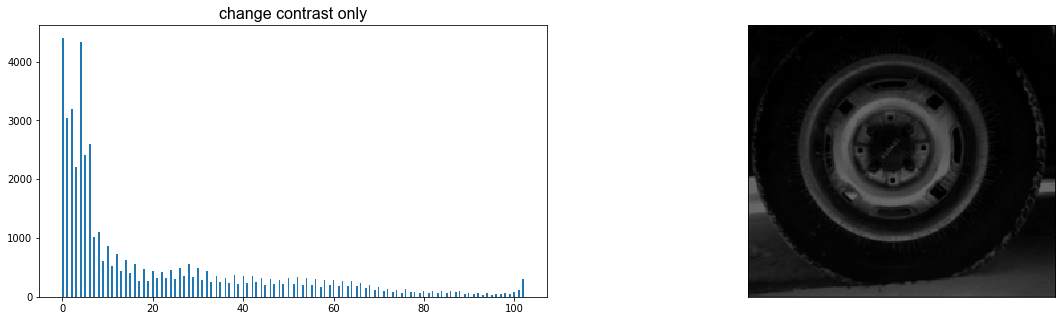

In [112]:
# 1.1.3 
fig, ax = plt.subplots(1,2,figsize=[20,5])
ax[0].set_title('change contrast only',**axis_font)

img_scaled = (img_gray * 0.4).astype('uint8')
ax[0].hist(img_scaled.flatten(), bins = 256,stacked=True) #, density = False)# , histtype = 'step')
ax[1].imshow(img_scaled, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

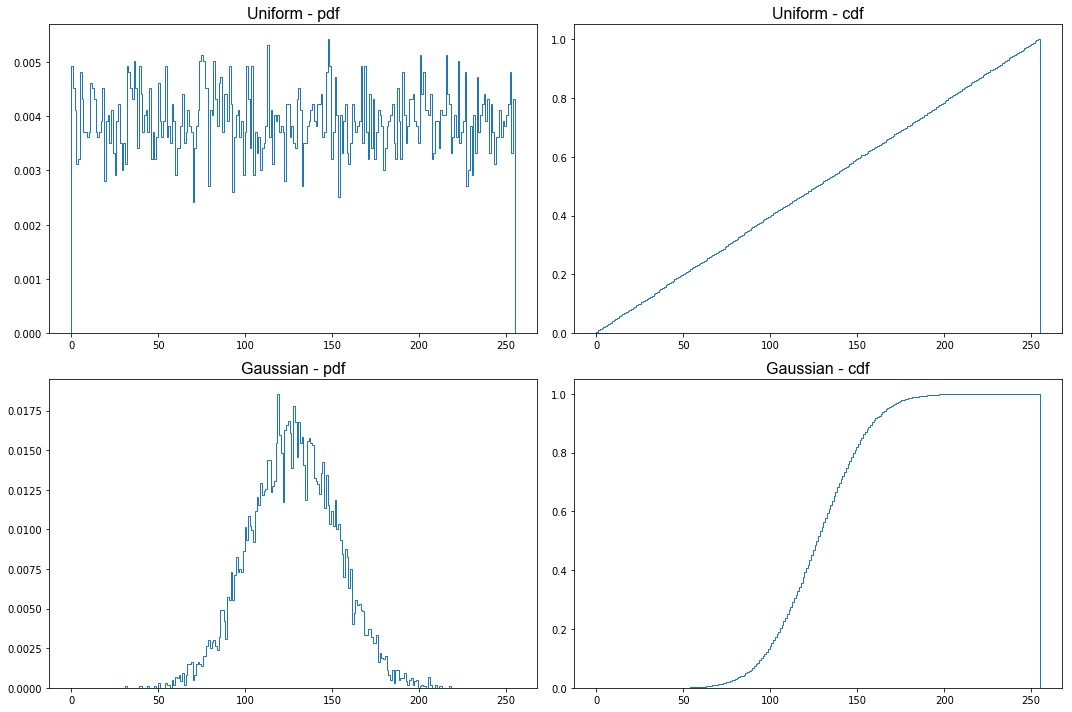

In [113]:
#-------------------------------------------Lab 1.2 - Warm up section--------------------------------------------
N = 10000 
uniform_int = np.random.randint(0, 256, size = N)
gaussian = np.random.normal(127.5, 25, N)
 
fig, axs = plt.subplots(2, 2, figsize=[15,10])
while ((np.min(gaussian) < 0) or (np.max(gaussian) > 255)):
  gaussian = np.random.normal(127.5, 25, N)
 
titles =["Uniform - pdf","Uniform - cdf"]
titles2 =["Gaussian - pdf","Gaussian - cdf"]


for (title1,title2,ax1,ax2,index) in itertools.zip_longest(titles,titles2,axs[0],axs[1],range(1,3)):
  ax1.hist(uniform_int, bins = 256, range = [0, 255], density = index,cumulative=index-1, histtype = 'step')
  ax2.hist(gaussian, bins = 256, range = [0, 255], density = index,cumulative=index-1 ,histtype = 'step')
  ax1.set_title(title1,**axis_font)
  ax2.set_title(title2,**axis_font)


plt.tight_layout()
plt.show()

In [4]:
#------------------------------------Lab 1.3 - Warm up section------------------------------------------
#1.3.2-1.3.1
N = 1000 
x = np.random.randint(0, 256, size = N)
tx1= Transform(x)
tx2 = TransformUsingLookup(x)
if (np.array_equal(tx1,tx2)):
     print("They are same")
else :
    print("They are not same")




They are same


In [8]:
#1.3.3
N = 100000000
x = np.random.randint(0,256,size=N)


timeCurrent = time.time()
tx = Transform(x)
timeAfter = time.time()
dt = timeAfter - timeCurrent
print(f"transform time for N = {N} points take {dt} seconds " )

timeCurrent = time.time()
tx2 = TransformUsingLookup(x)
timeAfter = time.time()
dt2 = timeAfter - timeCurrent
print(f"Transform time Using Lookup for N = {N} points take {dt2} seconds " )

dev = dt2 / dt
print(f"time improved by  {dev}")

tx = None
tx2 = None

transform time for N = 100000000 points take 6.834334135055542 seconds 
Transform time Using Lookup for N = 100000000 points take 3.956507921218872 seconds 
time improved by  0.5789163718122362


In [7]:
#1.3.4
N = 1000
x = np.random.randint(0, 256, size = N)

signalToEnergy = np.std(x)
xInvers = InverseTransform(Transform(x))
diff_x = x - xInvers
noiseToEnergy = np.std(diff_x)
print(signalToEnergy/noiseToEnergy)

xInvers = InverseTransformUsingLookup(TransformUsingLookup(x))
delta_x = x - xInvers
noiseToEnergy2 = np.std(diff_x)
print(signalToEnergy/noiseToEnergy2)

99.60161125894635
99.60161125894635


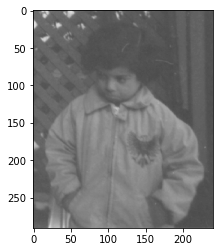

In [3]:
#------------------------------------Lab 2.1. - Warm up section------------------------------------------
img_gray2 = cv.imread("Pictures\\pout.tif", cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray2, cmap = 'gray', vmin = 0, vmax = 255)

max of image: 224
min of image: 74


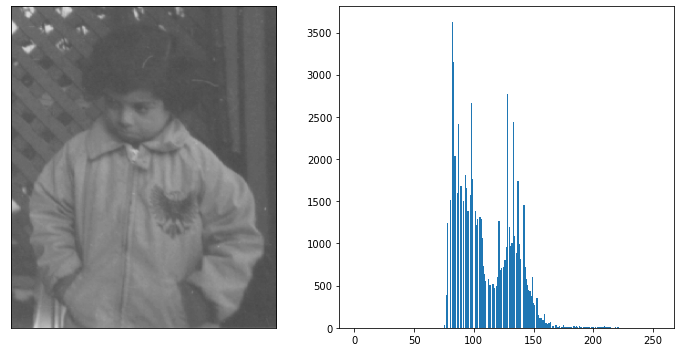

In [24]:
# Lab 2.1 
print(f"max of image: {np.max(img_gray2)}"  )
print(f"min of image: {np.min(img_gray2)}" )

figure, ax = plt.subplots(1,2,figsize=[10,5])
ax[0].get_yaxis().set_visible(False)
ax[0].get_xaxis().set_visible(False)
ax[0].imshow(img_gray2, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].hist(img_gray2.flatten(), bins = 256, range = (0, 255), density = False)
figure.tight_layout()
plt.show()

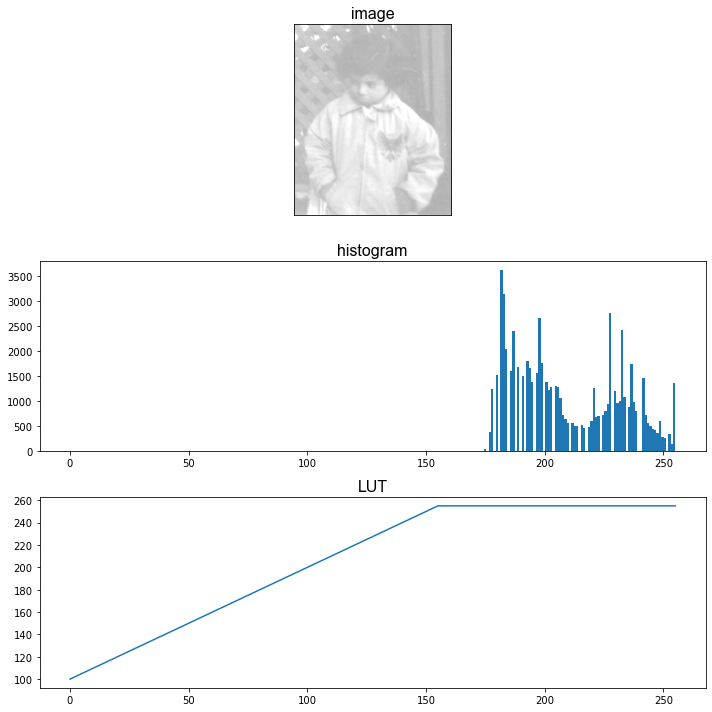

In [5]:
#Lab 2.1. part-2.1
# add brightness by adding constant
delta_brightness = 100 # chosen arbitrarily
# lookup table
TransformUsingLookup.lookUpTable = np.clip(np.arange(256) + delta_brightness, 0, 255)
# the image is uint8 so convert to float and then crop to 0-255
img_brightened = TransformUsingLookup(img_gray2,delta_brightness)
titles = ["image" , "histogram" , "LUT" ]
# plot
figure, ax = plt.subplots(3,1,figsize=[10,10])

ax[0].imshow(img_brightened, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].hist(img_brightened.flatten(), bins = 256, range = (0, 255), density = False)
ax[2].plot(TransformUsingLookup.lookUpTable)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

for (title,a) in itertools.zip_longest(titles,ax):
    a.set_title(title,**axis_font)

figure.tight_layout() #make sure the labels dont overlap
plt.show()

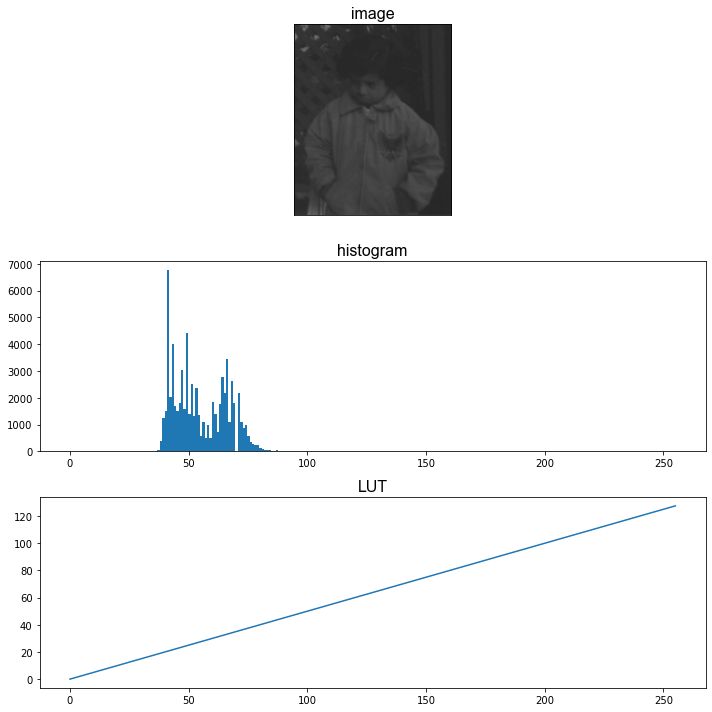

In [9]:
#Lab 2.1. part-2.2

# lower contrast by multiplying by constant
contrast_modifier = 0.5 # chosen arbitrarily
# lookup table
TransformUsingLookup.lookUpTable = np.clip(np.arange(256) * contrast_modifier, 0, 255)

# the image is uint8 so convert to float
img_contrasted = TransformUsingLookup(img_gray2,multiplication=contrast_modifier)

titles = ["image" , "histogram" , "LUT" ]
# plot
figure, ax = plt.subplots(3,1,figsize=[10,10])

ax[0].imshow(img_contrasted, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].hist(img_contrasted.flatten(), bins = 256, range = (0, 255), density = False)
ax[2].plot(TransformUsingLookup.lookUpTable)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

for (title,a) in itertools.zip_longest(titles,ax):
    a.set_title(title,**axis_font)

figure.tight_layout() #make sure the labels dont overlap
plt.show()

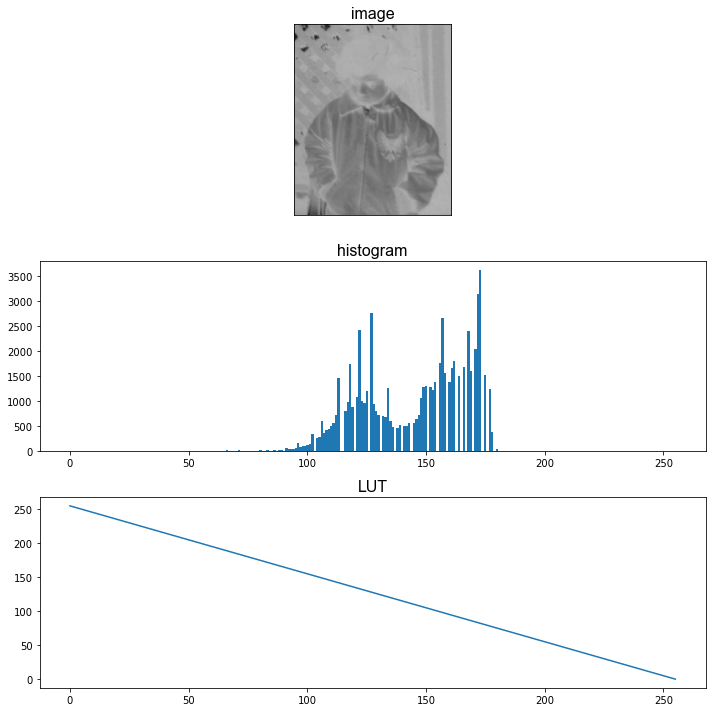

In [11]:
#Lab 2.1. part-2.3
# perform negative by doing 255 - img
# lookup table
TransformUsingLookup.lookUpTable = 255 - np.arange(256)

img_negative = TransformUsingLookup(img_gray2)
titles = ["image" , "histogram" , "LUT" ]
# plot
figure, ax = plt.subplots(3,1,figsize=[10,10])

ax[0].imshow(img_negative, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].hist(img_negative.flatten(), bins = 256, range = (0, 255), density = False)
ax[2].plot(TransformUsingLookup.lookUpTable)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

for (title,a) in itertools.zip_longest(titles,ax):
    a.set_title(title,**axis_font)

figure.tight_layout() #make sure the labels dont overlap
plt.show()

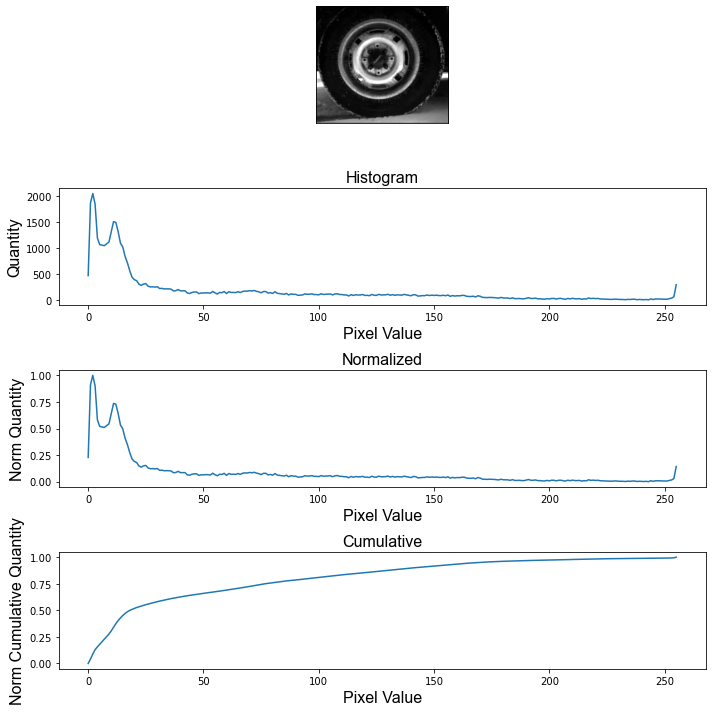

In [4]:
Histogram(img_gray,'all')
plt.tight_layout()

In [5]:
# Return the 4x256 array to x.
x = Histogram(img_gray,'array')


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


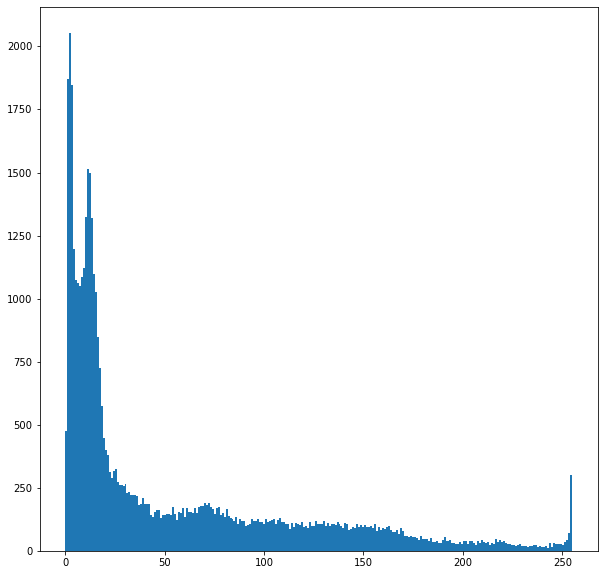

In [6]:
figure, our_hist = plt.subplots(figsize=[10,10])
our_hist = x[1]
 
hist_ = plt.hist(img_gray.flatten(), bins = 256, range = (0, 255), density = False)
delta_hist = our_hist - hist_[0]
print(delta_hist)

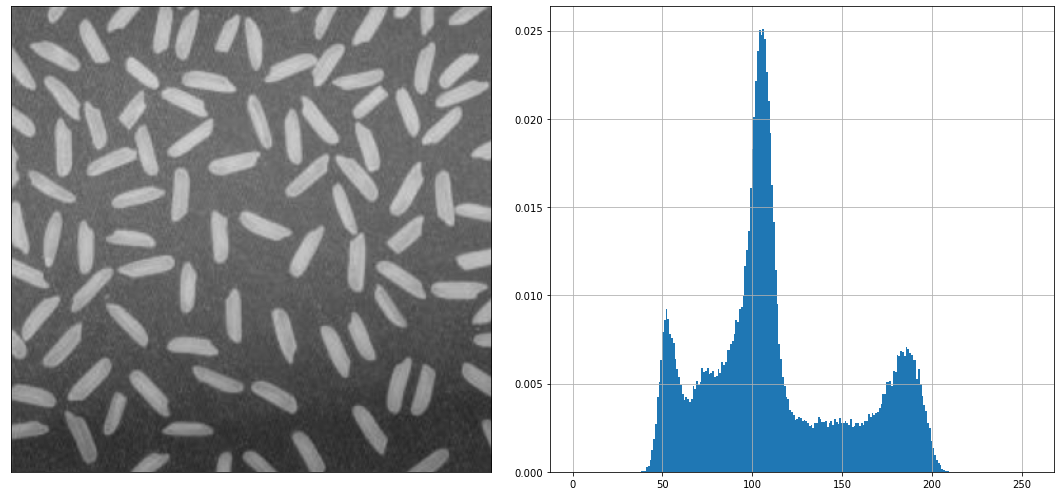

In [7]:
# import rice image
# taken from matlab

img_gray3 = cv.imread("Pictures\\rice.tif", cv.IMREAD_GRAYSCALE)
figure, ax = plt.subplots(1,2,figsize=[15,7])

ax[0].imshow(img_gray3, cmap = 'gray', vmin = 0, vmax = 255)
rice_hist = ax[1].hist(img_gray3.flatten(), bins = 256, range = (0, 255), density = True, cumulative = False)
ax[1].grid()
ax[0].get_yaxis().set_visible(False)
ax[0].get_xaxis().set_visible(False)

figure.tight_layout() #make sure the labels dont overlap
plt.show()

<Figure size 720x360 with 0 Axes>

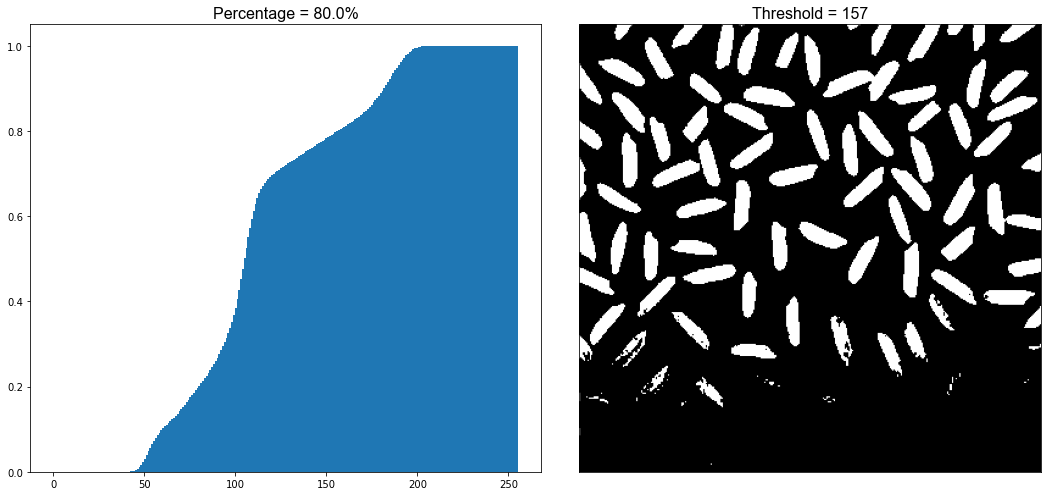

In [39]:
percentage = 0.8 # set in question
figure, ax = plt.subplots(figsize=[10,5])

# rice_hist contains both the histogram and the cumulative histogram (CDF)
cumulative = plt.hist(img_gray3.flatten(), bins = 256, range = (0, 255), density = True, cumulative = True)

# find index of first value above percentage
indexOfPercentage = np.argmax(cumulative[0] > percentage)
plt.clf()
# apply threshold to image
applyTreshgold = img_gray3 > indexOfPercentage

titles = [f'Percentage = {percentage*100}\u0025',f'Threshold = {indexOfPercentage}']
figure, ax = plt.subplots(1,2,figsize=[15,7])

ax[0].hist(img_gray3.flatten(), bins = 256, range = (0, 255), density = True, cumulative = True)
ax[1].imshow(applyTreshgold, cmap = 'gray', vmin = 0, vmax = 1)

for (a,title) in itertools.zip_longest(ax,titles) :
    a.set_title(title,**axis_font)

ax[1].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()
# the threshold definetly does not do the job

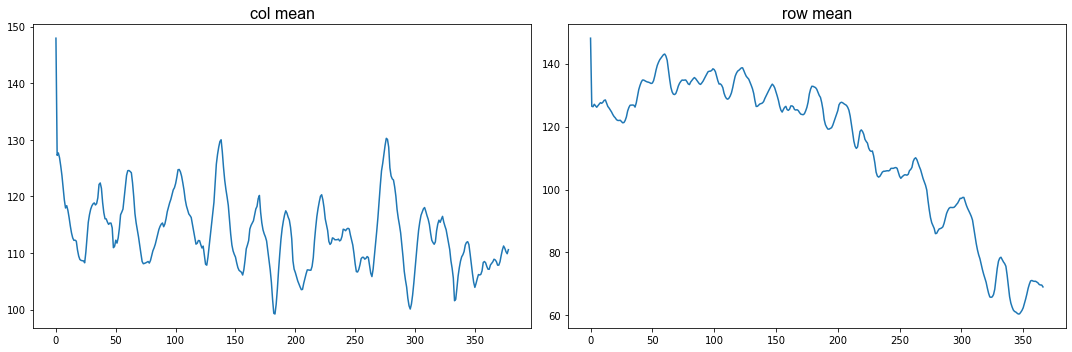

In [42]:
# find row and column mean
means = []
means.append(np.mean(img_gray3, axis = 0))#column mean
means.append(np.mean(img_gray3, axis = 1))#row mean

titles = {"row mean","col mean"}
figure, ax = plt.subplots(1,2,figsize=[15,5])

for (a,title,plot) in itertools.zip_longest(ax,titles,means):
    a.plot(plot)
    a.set_title(title,**axis_font)

figure.tight_layout() #magic function MAKE PREATY !!!
plt.show()


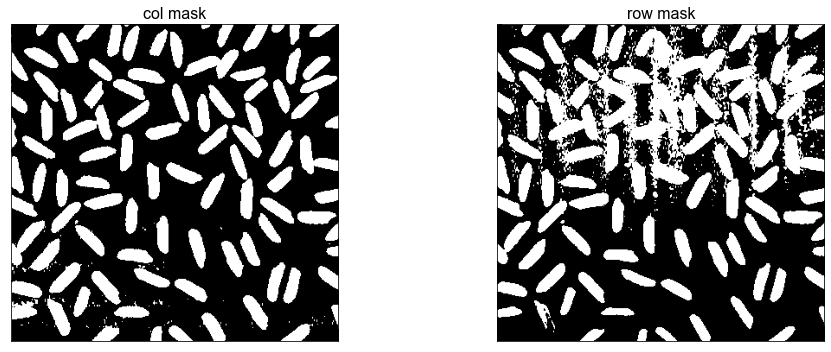

In [52]:
#--------------------------Next Steps------------------------------
# optimal solution:
# treshold 0.8 failed missrebly so we will try another idea.
# We can use a different threshold for every row and every column .
means = []
means.append(np.mean(img_gray3, axis = 0))#column mean
means.append(np.mean(img_gray3, axis = 1))#row mean

rowMask = np.array(img_gray3, copy = True)
for row in range(0, len(rowMask)):
  rowMask[row] = rowMask[row] > means[1][row]

colMask = np.array(img_gray3, copy = True)
for col in range(0, len(colMask[0])):
  colMask[:,col] = colMask[:,col] > means[0][col] 

plots = [rowMask,colMask]
titles = {"row mask","col mask"}
figure, ax = plt.subplots(1,2,figsize=[15,5])

for (a,title,plot) in itertools.zip_longest(ax,titles,plots):
    a.imshow(plot, cmap = 'gray', vmin = 0, vmax = 1)
    a.set_title(title,**axis_font)
    a.get_yaxis().set_visible(False)
    a.get_xaxis().set_visible(False)
    
figure.tight_layout() #magic function MAKE PREATY !!!
plt.show()


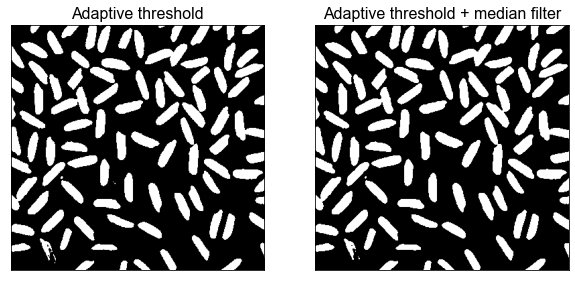

In [51]:
# apply AND between masks
means = []
means.append(np.mean(img_gray3, axis = 0))#column mean
means.append(np.mean(img_gray3, axis = 1))#row mean

rowMask = np.array(img_gray3, copy = True)
for row in range(0, len(rowMask)):
  rowMask[row] = rowMask[row] > means[1][row]

colMask = np.array(img_gray3, copy = True)
for col in range(0, len(colMask[0])):
  colMask[:,col] = colMask[:,col] > means[0][col]
titles = ['Adaptive threshold','Adaptive threshold + median filter']
#And between col mask and row mask
plots = [colMask * rowMask]
#apply 3x3 median filter 

#----------------------ploting stuff------------------------------------
plots.append(cv.medianBlur(plots[0], 3))
figure, ax = plt.subplots(1,2,figsize=[10,7])
for (a,title,plot) in itertools.zip_longest(ax,titles,plots):
    a.imshow(plot, cmap = 'gray', vmin = 0, vmax = 1)
    a.set_title(title,**axis_font)
    a.get_yaxis().set_visible(False)
    a.get_xaxis().set_visible(False)


# 2.3 and 3.3.1